# Data

In [10]:
import pandas as pd
from pathlib import Path

def open_fn(f):
    try:
        return pd.read_csv(f,engine='python')
    except:
        return pd.DataFrame()

files = Path('../data/futurists_kol/data').rglob('*csv')
outs = map(open_fn, files)
outs = pd.concat(outs)
outs.columns = ['index','user','timestamp','url','txt']
outs.reset_index(drop=True,inplace=True)
print(outs['user'].nunique(),len(outs)) # 257 users, 1254244 tweets
outs['txt'] = outs['txt'].astype(str)
outs.head()

257 1254244


,index,user,timestamp,url,txt
0,0,@sueduris,2022-11-10 12:57:31+00:00,https://twitter.com/SueDuris/status/1590690116...,@vueling Just sent dm
1,1,@sueduris,2022-11-10 12:26:26+00:00,https://twitter.com/SueDuris/status/1590682291...,@vueling I'm trying to file a claim on luggage...
2,2,@sueduris,2022-11-07 21:22:48+00:00,https://twitter.com/SueDuris/status/1589730108...,@luismelo78 I am now but not so much before.
3,3,@sueduris,2022-11-07 20:58:22+00:00,https://twitter.com/SueDuris/status/1589723958...,"@EmilyEwingMusic @HSBC_UK WTF, man?!!"
4,4,@sueduris,2022-11-07 20:54:03+00:00,https://twitter.com/SueDuris/status/1589722875...,I can't get into my @HSBC_UK mobile or online ...


# Vocabulary

TODO: #4 How to tokenize?

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = outs['txt'].to_list()
token_pattern=r'\b\w\w+\b|(?<!\w)@\w+|(?<!\w)#\w+'
vectorizer = CountVectorizer(
    token_pattern=token_pattern, 
    min_df=10,
    stop_words='english'
)
X = vectorizer.fit_transform(corpus)
X.shape

(1254244, 75059)

In [12]:
import numpy as np
import pandas as pd

word_counts = pd.Series(data=np.asarray(X.sum(axis=0)).ravel(),
          index=vectorizer.get_feature_names_out())

hash_counts = word_counts[word_counts.index.str.contains('#')].sort_values(ascending=False)
mention_counts = word_counts[word_counts.index.str.contains('@')].sort_values(ascending=False)

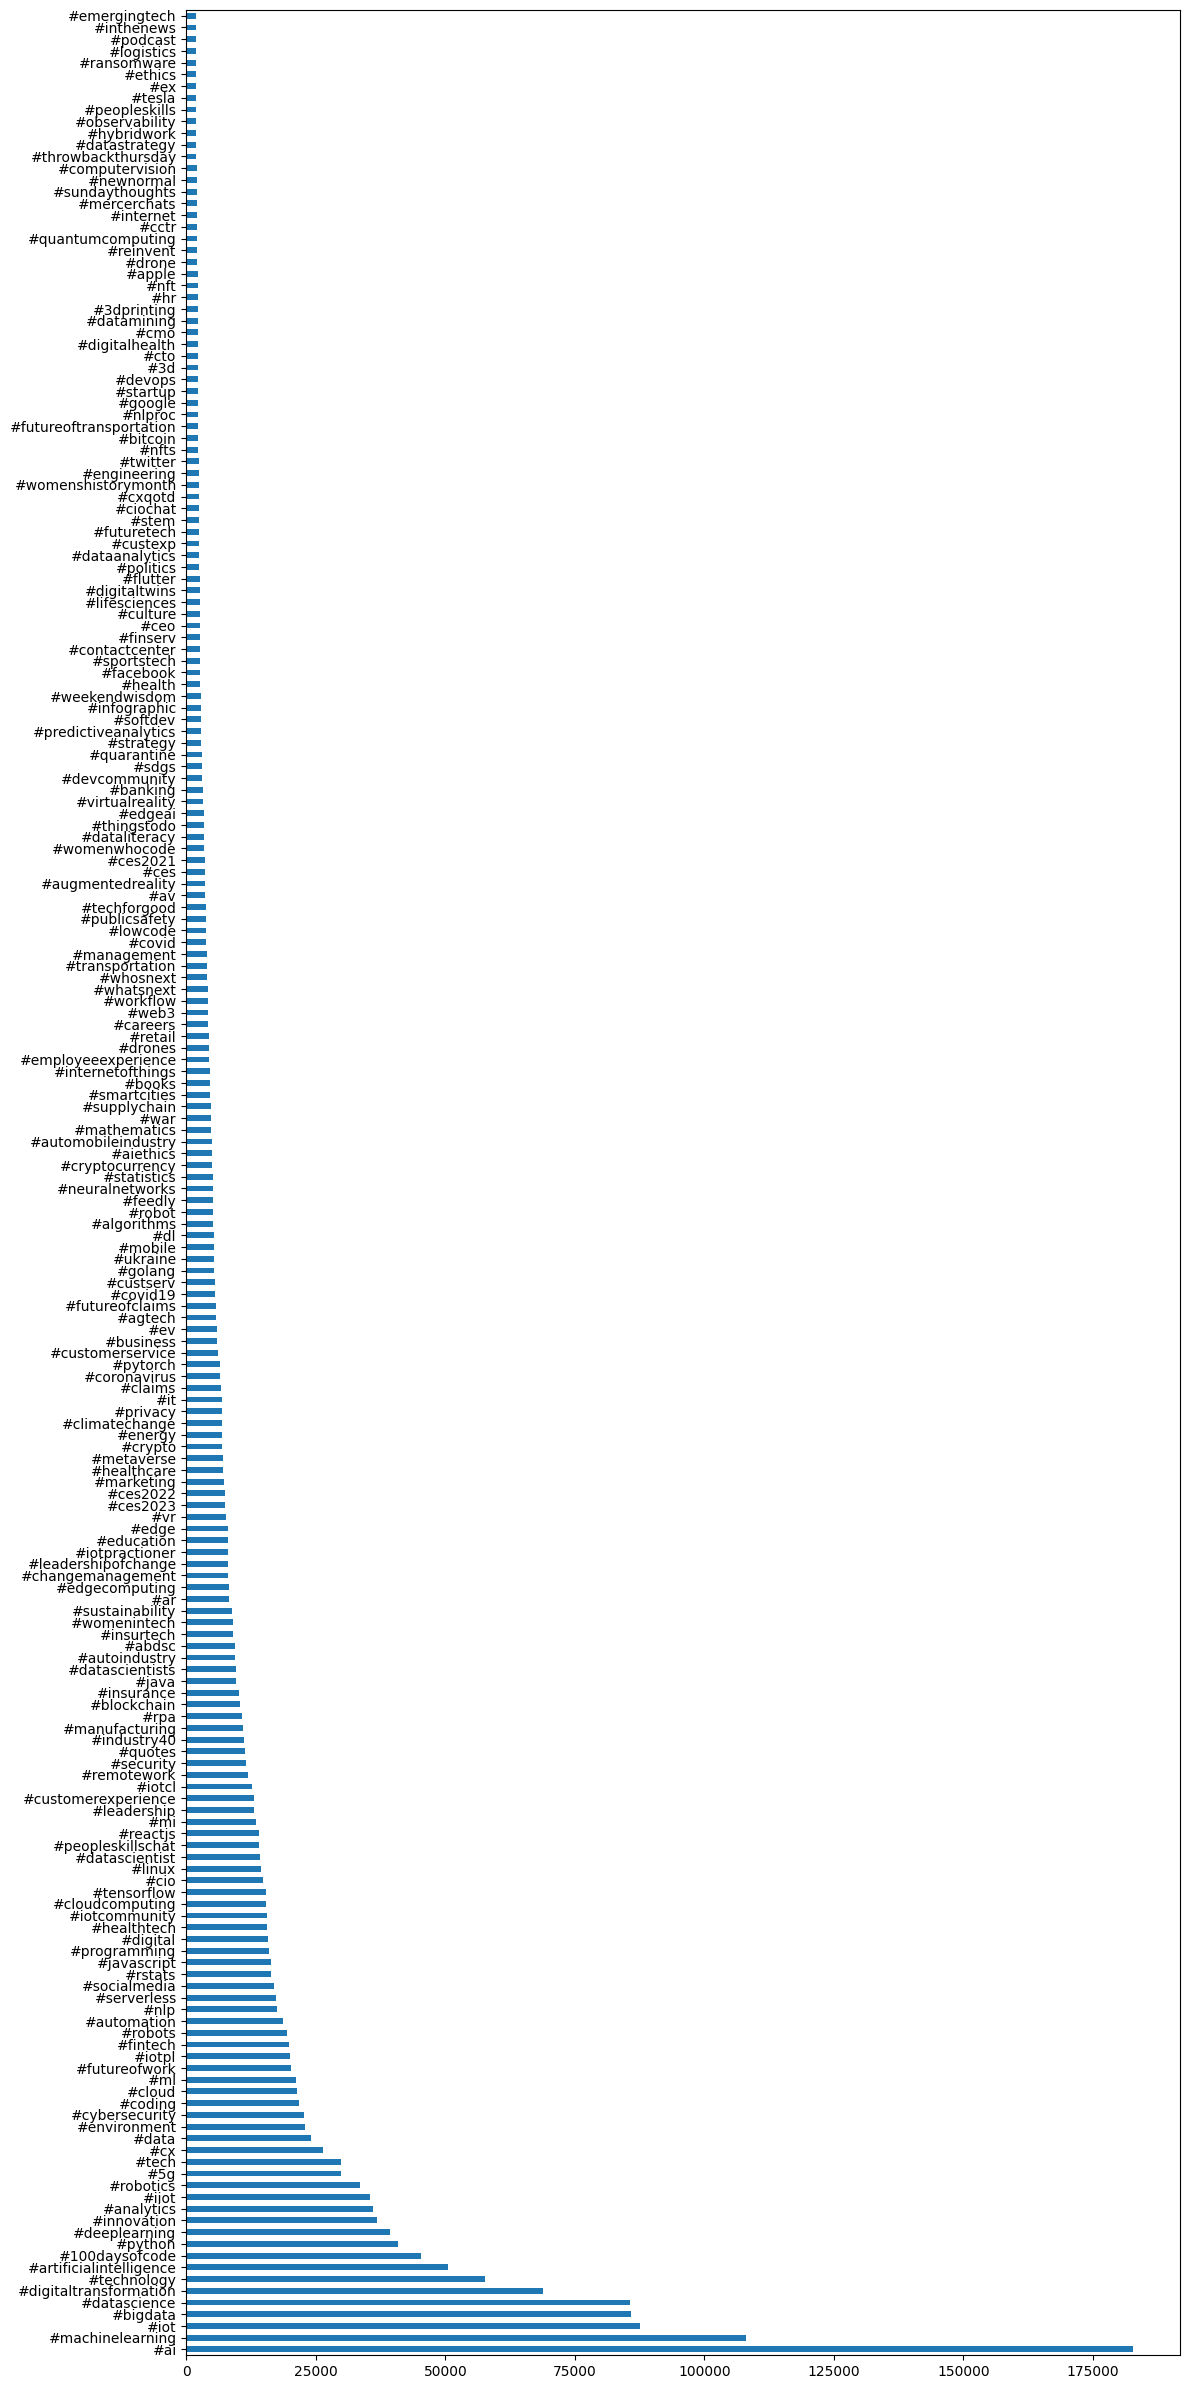

In [13]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,24))
hash_counts[:200].plot.barh(ax=ax)
plt.tight_layout()

In [14]:
fig.savefig('vocab.svg')

## Topic Modelling

## Toy Example

In [15]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, LdaMulticore

# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
lda = LdaMulticore(common_corpus, id2word=common_dictionary, num_topics=10, per_word_topics=True, workers=3)
lda.print_topics()

[(0,
  '0.083*"trees" + 0.083*"graph" + 0.083*"user" + 0.083*"computer" + 0.083*"minors" + 0.083*"system" + 0.083*"survey" + 0.083*"time" + 0.083*"eps" + 0.083*"interface"'),
 (1,
  '0.083*"trees" + 0.083*"graph" + 0.083*"minors" + 0.083*"system" + 0.083*"user" + 0.083*"eps" + 0.083*"computer" + 0.083*"response" + 0.083*"time" + 0.083*"interface"'),
 (2,
  '0.212*"system" + 0.212*"interface" + 0.212*"user" + 0.212*"eps" + 0.019*"trees" + 0.019*"graph" + 0.019*"computer" + 0.019*"minors" + 0.019*"response" + 0.019*"time"'),
 (3,
  '0.212*"human" + 0.212*"interface" + 0.212*"computer" + 0.211*"trees" + 0.019*"graph" + 0.019*"user" + 0.019*"system" + 0.019*"eps" + 0.019*"minors" + 0.019*"time"'),
 (4,
  '0.262*"trees" + 0.262*"graph" + 0.262*"minors" + 0.024*"system" + 0.024*"user" + 0.024*"survey" + 0.024*"time" + 0.024*"eps" + 0.024*"computer" + 0.024*"interface"'),
 (5,
  '0.153*"time" + 0.153*"system" + 0.153*"user" + 0.153*"computer" + 0.153*"response" + 0.153*"survey" + 0.014*"trees

In [74]:
common_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

In [75]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [39]:
#common_corpus

## Training

In [16]:
id2word = dict(enumerate(vectorizer.get_feature_names_out()))

In [17]:
corpus = [list(zip(r.indices,r.data)) for r in X]

In [13]:
from gensim.models import LdaMulticore
lda = LdaMulticore(corpus, id2word=id2word, num_topics=10, workers=3, passes=10)
lda.save('my_model')

In [19]:
from gensim.models import LdaMulticore
lda = LdaMulticore.load('my_model')

## Topics

In [20]:
lda.print_topics()

[(0,
  '0.059*"https" + 0.027*"#digitaltransformation" + 0.022*"digital" + 0.018*"@dhinchcliffe" + 0.016*"cloud" + 0.016*"transformation" + 0.013*"@furrier" + 0.012*"@dvellante" + 0.011*"@rwang0" + 0.010*"@ctoadvisor"'),
 (1,
  '0.083*"change" + 0.074*"https" + 0.044*"#leadershipofchange" + 0.043*"#changemanagement" + 0.035*"#cx" + 0.034*"leadership" + 0.030*"management" + 0.025*"customer" + 0.017*"experience" + 0.016*"#customerexperience"'),
 (2,
  '0.056*"https" + 0.028*"world" + 0.028*"mypov" + 0.020*"gt" + 0.009*"billion" + 0.008*"#sustainability" + 0.008*"#custserv" + 0.008*"car" + 0.007*"global" + 0.006*"energy"'),
 (3,
  '0.068*"thanks" + 0.044*"https" + 0.041*"amp" + 0.028*"latest" + 0.028*"news" + 0.016*"data" + 0.015*"thank" + 0.014*"great" + 0.012*"free" + 0.011*"analytics"'),
 (4,
  '0.089*"https" + 0.009*"body" + 0.009*"new" + 0.008*"interesting" + 0.008*"covid" + 0.006*"mypov" + 0.006*"space" + 0.006*"like" + 0.006*"talking" + 0.006*"introduction"'),
 (5,
  '0.138*"https"

NameError: name 'corpus' is not defined

In [23]:
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.corpora import Dictionary

corpus_dict = Dictionary.from_corpus(corpus, id2word)

pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, corpus_dict)
vis_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.148215 -0.223192       1        1  15.348920
5      0.135150 -0.133874       2        1  15.160412
8      0.126328  0.193616       3        1  12.689312
4      0.121341  0.047535       4        1  10.178006
7     -0.434856  0.079320       5        1   9.679484
9      0.105968 -0.035727       6        1   8.239201
0     -0.011597 -0.214320       7        1   8.108319
2      0.044009  0.143978       8        1   7.599880
1      0.111693 -0.053558       9        1   7.044450
3     -0.049819  0.196221      10        1   5.952018, topic_info=                   Term           Freq         Total Category  logprob  \
220                 #ai  214941.000000  2.149410e+05  Default  30.0000   
32184            change  143814.000000  1.438140e+05  Default  29.0000   
3955   #machinelearning  154594.000000  1.545940e+05  Default  28.0000   
31889                cc  144085.000000  1.440850e+05  Default  27.0000   
67125            thanks   72831.000000  7.283100e+04  Default  26.0000   
...                 ...            ...           ...      ...      ...   
62831           science    6995.239468  1.401611e+04  Topic10  -4.9855   
44607             https   45361.298045  1.250013e+06  Topic10  -3.1161   
53238             mypov   11444.251687  1.069108e+05  Topic10  -4.4933   
71602              week    5780.273962  1.243523e+04  Topic10  -5.1763   
67616             today    5127.460302  2.223527e+04  Topic10  -5.2962   

       loglift  
220    30.0000  
32184  29.0000  
3955   28.0000  
31889  27.0000  
67125  26.0000  
...        ...  
62831   2.1265  
44607  -0.4948  
53238   0.5869  
71602   2.0554  
67616   1.3544  

[525 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
8          1  0.999965  #100daysofcode
87         1  0.322279             #5g
87         7  0.677680             #5g
220        1  0.953559             #ai
220        2  0.046436             #ai
...      ...       ...             ...
73534      8  0.378525            year
73538      3  0.765950           years
73538      8  0.234030           years
73563      9  0.999801             yep
73570      3  0.999926             yes

[723 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 9, 5, 8, 10, 1, 3, 2, 4])

In [25]:
pyLDAvis.display(vis_data)